# WeatherPy¶

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}q={city}&appid={weather_api_key}"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | betio village
Processing Record 2 of Set 1 | anadyr
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | haiku-pauwela
Processing Record 5 of Set 1 | peterhead
Processing Record 6 of Set 1 | invercargill
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | seogwipo
City not found. Skipping...
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | vilyuchinsk
Processing Record 12 of Set 1 | ust-nera
Processing Record 13 of Set 1 | steinbach
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | warangal
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | touros
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | margaret river
Processi

Processing Record 37 of Set 4 | sault ste. marie
Processing Record 38 of Set 4 | kapuskasing
Processing Record 39 of Set 4 | pikalevo
Processing Record 40 of Set 4 | susuman
Processing Record 41 of Set 4 | kavaratti
Processing Record 42 of Set 4 | midvagur
Processing Record 43 of Set 4 | banjarmasin
Processing Record 44 of Set 4 | mount isa
Processing Record 45 of Set 4 | palmas
Processing Record 46 of Set 4 | hualien city
Processing Record 47 of Set 4 | dogubayazit
Processing Record 48 of Set 4 | gaigeturi
Processing Record 49 of Set 4 | muana
Processing Record 0 of Set 5 | old town
Processing Record 1 of Set 5 | sur
Processing Record 2 of Set 5 | odiongan
Processing Record 3 of Set 5 | delmas
Processing Record 4 of Set 5 | lutjenburg
Processing Record 5 of Set 5 | verkhnevilyuysk
Processing Record 6 of Set 5 | balikpapan
Processing Record 7 of Set 5 | enewetak
Processing Record 8 of Set 5 | aasiaat
Processing Record 9 of Set 5 | guerrero negro
Processing Record 10 of Set 5 | swan hil

Processing Record 26 of Set 8 | muzayri'
City not found. Skipping...
Processing Record 27 of Set 8 | gatton
Processing Record 28 of Set 8 | chonchi
Processing Record 29 of Set 8 | fuerte olimpo
Processing Record 30 of Set 8 | awjilah
Processing Record 31 of Set 8 | selkirk
Processing Record 32 of Set 8 | kirakira
Processing Record 33 of Set 8 | kindu
Processing Record 34 of Set 8 | kone
Processing Record 35 of Set 8 | fallingbrook
City not found. Skipping...
Processing Record 36 of Set 8 | isangel
Processing Record 37 of Set 8 | aboso
Processing Record 38 of Set 8 | bordighera
Processing Record 39 of Set 8 | sao joao da barra
Processing Record 40 of Set 8 | tofol
Processing Record 41 of Set 8 | vetralla
Processing Record 42 of Set 8 | 'ajab shir
City not found. Skipping...
Processing Record 43 of Set 8 | suva
Processing Record 44 of Set 8 | jaffa
Processing Record 45 of Set 8 | champoton
Processing Record 46 of Set 8 | newman
Processing Record 47 of Set 8 | nouadhibou
Processing Record

Processing Record 15 of Set 12 | kruisfontein
Processing Record 16 of Set 12 | jaguarari
Processing Record 17 of Set 12 | guigang
Processing Record 18 of Set 12 | pyapon
Processing Record 19 of Set 12 | tbeng meanchey
Processing Record 20 of Set 12 | alma
Processing Record 21 of Set 12 | kaoma
Processing Record 22 of Set 12 | kangding
Processing Record 23 of Set 12 | le luc
Processing Record 24 of Set 12 | springs
Processing Record 25 of Set 12 | tianshui
Processing Record 26 of Set 12 | aranda de duero
Processing Record 27 of Set 12 | colonia
Processing Record 28 of Set 12 | acarau
Processing Record 29 of Set 12 | gao
Processing Record 30 of Set 12 | faranah
Processing Record 31 of Set 12 | bahia blanca
Processing Record 32 of Set 12 | dipayal
Processing Record 33 of Set 12 | arica
Processing Record 34 of Set 12 | novotroitsk
Processing Record 35 of Set 12 | boca raton
Processing Record 36 of Set 12 | markivka
Processing Record 37 of Set 12 | tallinn
Processing Record 38 of Set 12 | t

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,betio village,1.3580,172.9211,301.17,78,100,6.91,KI,1704708784
1,anadyr,64.7500,177.4833,259.43,85,100,10.00,RU,1704708785
2,grytviken,-54.2811,-36.5092,277.58,84,15,2.83,GS,1704708787
3,haiku-pauwela,20.9219,-156.3051,297.62,85,0,6.17,US,1704708788
4,peterhead,57.5058,-1.7981,271.37,79,13,1.52,GB,1704708790


In [7]:
# Create the directory 

output_data = "output_data"
output_path = os.path.join(output_data, "cities.csv")

# Create the directory 
os.makedirs(output_data, exist_ok=True)

# Save the DataFrame to a CSV file
city_data_df.to_csv(output_path, index_label="City_ID")




In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
# Convert the temperature from Kelvin to Celsius
city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,betio village,1.3580,172.9211,28.02,78,100,6.91,KI,1704708784
1,anadyr,64.7500,177.4833,-13.72,85,100,10.00,RU,1704708785
2,grytviken,-54.2811,-36.5092,4.43,84,15,2.83,GS,1704708787
3,haiku-pauwela,20.9219,-156.3051,24.47,85,0,6.17,US,1704708788
4,peterhead,57.5058,-1.7981,-1.78,79,13,1.52,GB,1704708790


# Create the Scatter Plots Requested

## Latitude Vs. Temperature

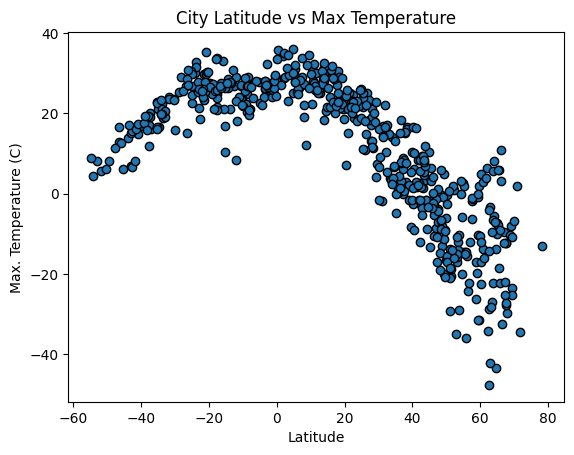

In [9]:
# Build scatter plot for latitude vs. temperature

x_values=city_data_df["Lat"]
y_values= city_data_df["Max Temp"]

# Plot scatter plot
plt.scatter(x_values,y_values,marker="o",edgecolors= "black")

# # Label plot
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature (C)')
plt.title("City Latitude vs Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude Vs. Humidity

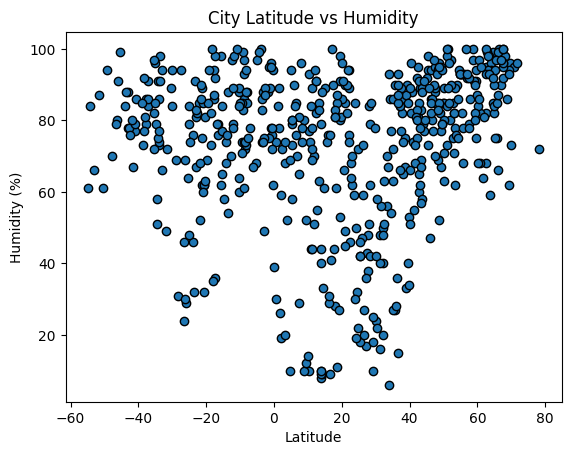

In [10]:
# Build scatter plot for latitude vs. Humidity

x_values=city_data_df["Lat"]
y_values= city_data_df["Humidity"]

# Plot scatter plot
plt.scatter(x_values,y_values,marker="o",edgecolors= "black")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude Vs. Cloudiness

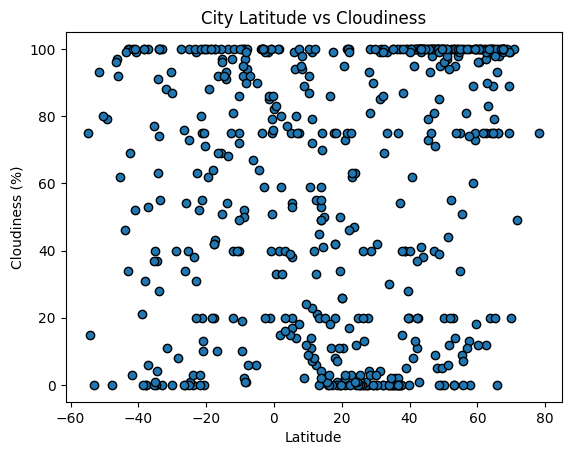

In [11]:
# Build scatter plot for latitude vs. Humidity

x_values=city_data_df["Lat"]
y_values= city_data_df["Cloudiness"]

# Plot scatter plot
plt.scatter(x_values,y_values,marker="o",edgecolors= "black")


# # Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs Cloudiness")

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

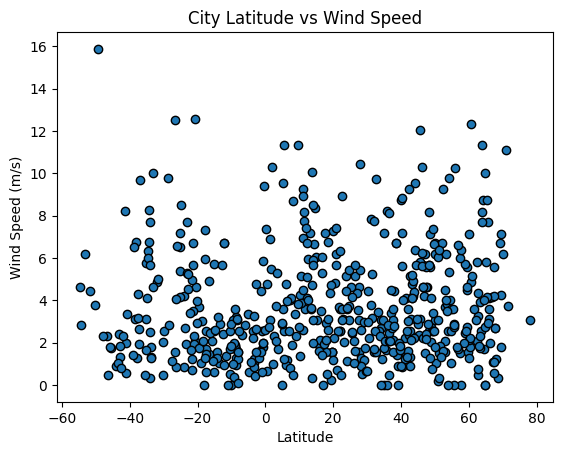

In [12]:
# Build scatter plot for latitude vs. Humidity

x_values=city_data_df["Lat"]
y_values= city_data_df["Wind Speed"]

# Plot scatter plot
plt.scatter(x_values,y_values,marker="o",edgecolors= "black")


# # Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

# Requirement 2: Compute Linear Regression for Each Relationship

In [13]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-value is: {rvalue}")
# Plot scatter plot
    plt.scatter(x_values,y_values)

# Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.min(),y_values.min()),fontsize=15,color="red")
    plt.tight_layout()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,betio village,1.3580,172.9211,28.02,78,100,6.91,KI,1704708784
1,anadyr,64.7500,177.4833,-13.72,85,100,10.00,RU,1704708785
3,haiku-pauwela,20.9219,-156.3051,24.47,85,0,6.17,US,1704708788
4,peterhead,57.5058,-1.7981,-1.78,79,13,1.52,GB,1704708790
7,yellowknife,62.4560,-114.3525,-34.28,82,75,2.06,CA,1704708773


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,4.43,84,15,2.83,GS,1704708787
5,invercargill,-46.4000,168.3500,16.68,80,97,0.45,NZ,1704708791
6,adamstown,-25.0660,-130.1015,22.64,84,100,5.37,PN,1704708793
12,punta arenas,-53.1500,-70.9167,8.06,66,0,6.17,CL,1704708801
14,port-aux-francais,-49.3500,70.2167,8.08,94,79,15.88,TF,1704708805


# Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8776233478005188


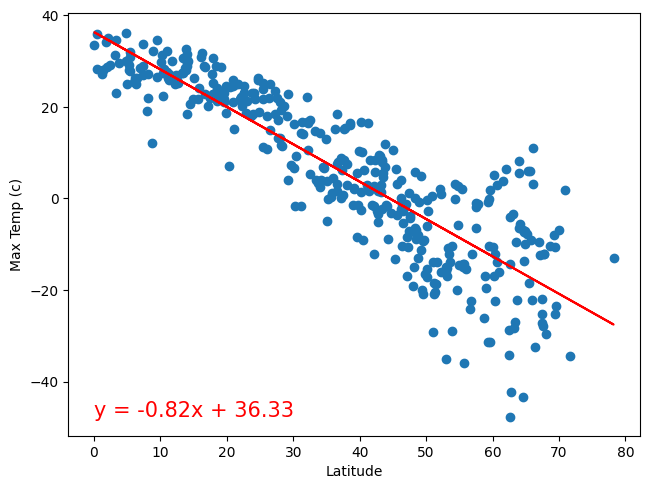

In [16]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temp (c)")
plt.show()

The r-value is: 0.6750651166017461


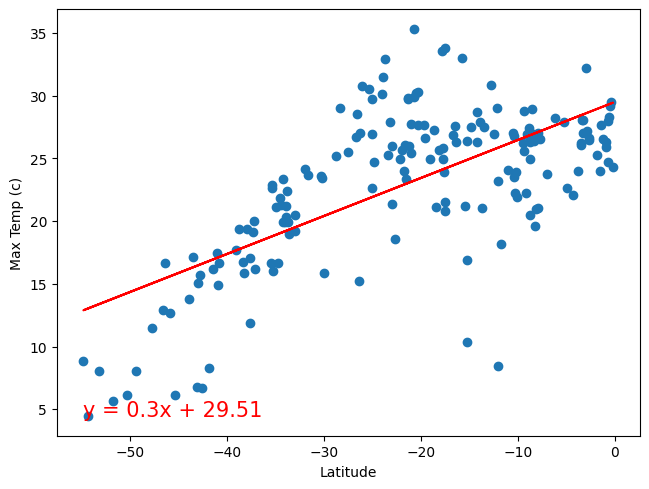

In [17]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temp (c)")
plt.show()

Discussion about the linear relationship: 
Linear regression on Northern Hemisphere is r=−0.87 which means there is a strong negative correlation between latitude and maximum temperature in the Northern Hemisphere.
In other words as the latitude increases (moving away from the equator), the temperature tends to decrease.

Linear regression on Southern Hemisphere is r=0.67 which means there is a moderate positive correlation between latitude and maximum temperature in the Southern Hemisphere.

In another words as latitude increases (moving toward the equator), the temperature tends to increase.

# Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4591489837869504


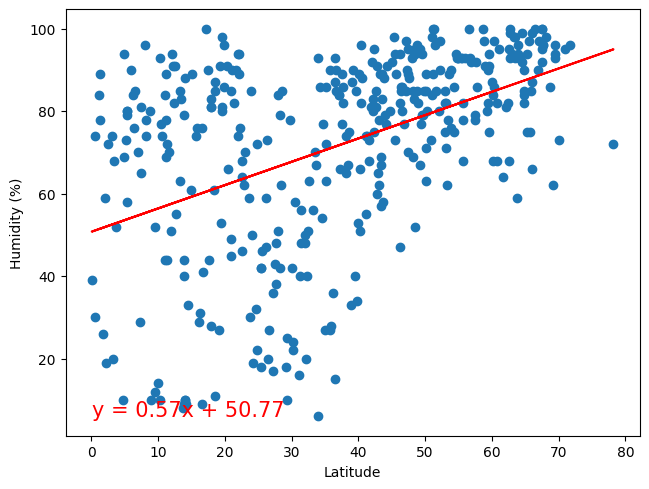

In [18]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

The r-value is: 0.0684431511378625


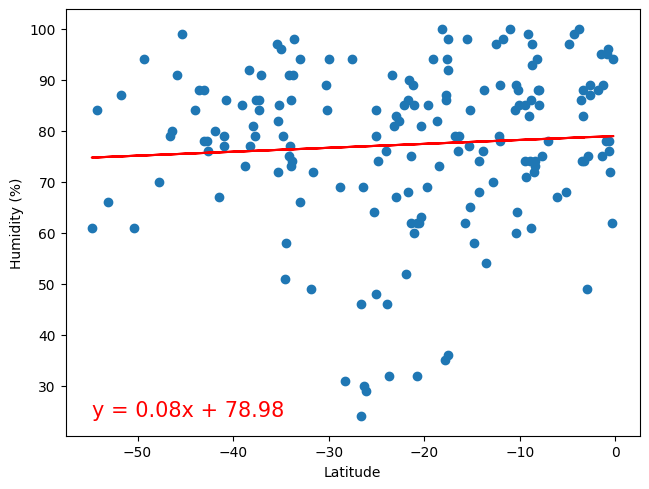

In [19]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

Discussion about the linear relationship: 
Linear regression on Northern Hemisphere is  r=0.46, which means there are moderate positive correlation between latitude and humidity percentage in Northern hemisphere. 
In other words as latitude increases (moving away from the equator), humidity tends to increase.

Linear regression on Southern Hemisphere is r=0.07 which means there is a weak positive correlation between latitude and humidity percentage in the Southern Hemisphere.

In another words as latitude increases (moving toward the equator), the humidity tends to increase, but the correlation is not as strong as Northern Hemisphere. 

# Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3578482307729183


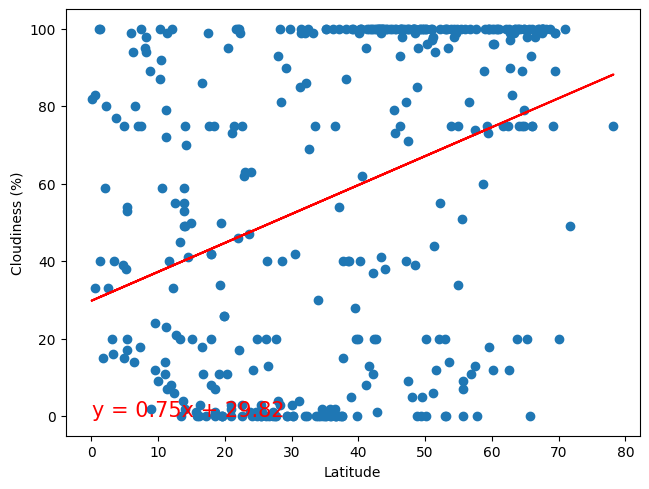

In [20]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

The r-value is: 0.17457354790609503


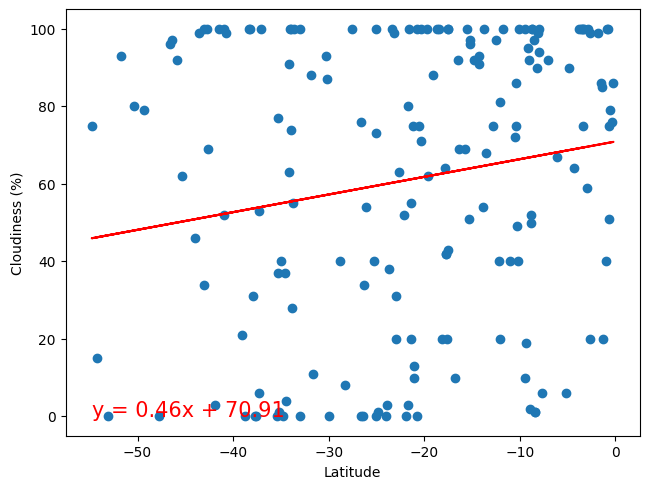

In [21]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

Discussion about the linear relationship: 
Linear regression on Northern Hemisphere is  r=0.36, which means there is a weak positive correlation between latitude and cloudiness percentage in the Northern Hemisphere.
In other words as latitude increases (moving away from the equator), cloudiness percentage tends to increase, but the correlation is not strong.

Linear regression on Southern Hemisphere is r=0.17 which means there is a weak positive correlation between latitude and cloudiness percentage in the Southern Hemisphere.

In another words as latitude increases (moving toward the equator), cloudiness percentage tends to increase, but the correlation is not strong.

# Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.0155443008495666


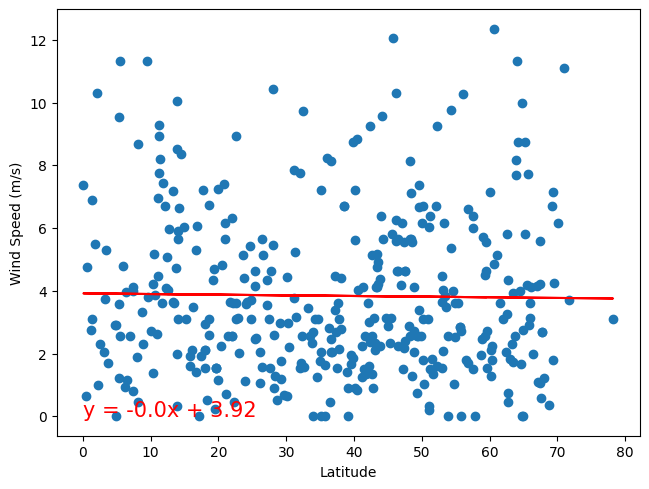

In [22]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

The r-value is: -0.23194032690579489


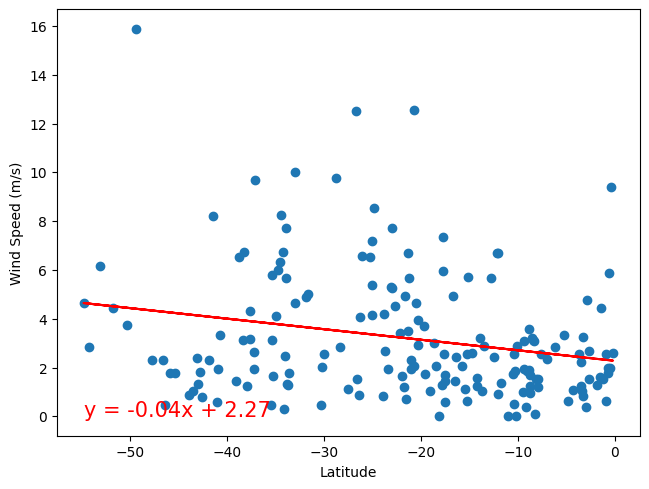

In [24]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

Discussion about the linear relationship: 
again, in both the cases r- values, indicating a very weak correlation between latitude and wind speed. This suggests that latitude alone may not be a strong predictor of wind speed, and other factors may play a more significant role in influencing wind speed.